<a href="https://colab.research.google.com/github/aisha-partha/Delivery-Demand-Prediction/blob/main/Delivery_Demand_Prediction_EDA_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

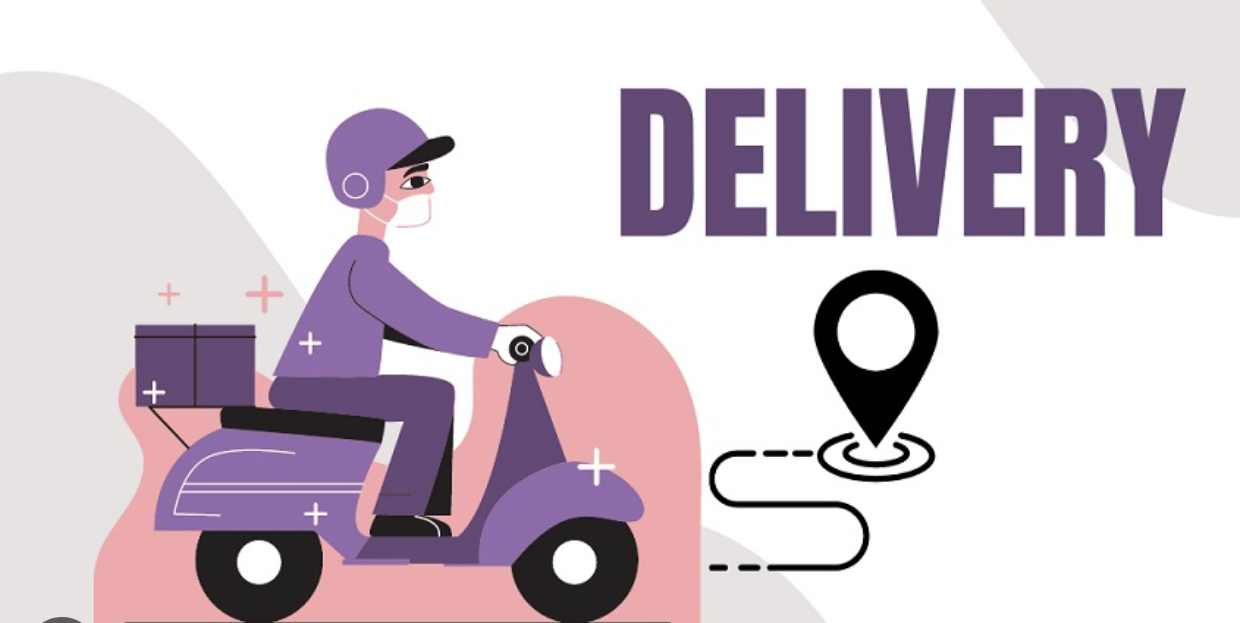


Summary

The food delivery time prediction model plays a crucial role in the food delivery industry, where prompt and accurate delivery is of utmost importance. Delivery time directly impacts customer satisfaction and influences their overall experience.

To develop an effective prediction model, we began by thoroughly cleaning the dataset, ensuring it was free from errors and inconsistencies. This step was vital in ensuring the reliability and accuracy of the model's predictions.

Feature engineering was then employed to extract valuable insights from the dataset. By considering factors such as delivery person age, ratings, location coordinates, and time-related variables, we aimed to capture key variables that influence delivery time. These engineered features contributed to the model's predictive capabilities.

Using regression algorithms like linear regression, decision tree, random forest,XGBoost we built the predictive model. It was trained on a subset of the dataset using techniques like cross-validation to ensure robustness. Evaluation metrics such as mean squared error (MSE) and R-squared (R2) score were used to assess the model's accuracy. The food delivery time prediction model empowers businesses to optimize their operations and improve the overall delivery experience for their customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from geopy.distance import geodesic

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder



from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')




Load and Understand the data

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [3]:
df_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [4]:
print("Train Dataset :", df_train.shape)

Train Dataset : (45593, 20)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [6]:
#Check statistical values for fields with numerical datatype
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [7]:
#Check statistical values for fields with other than numerical datatype
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,45593,45593,4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


In [8]:
#checking for null values

df_train.columns[df_train.isnull().any()].tolist()

[]

Observations:

- Data Formatting will be required for Weatherconditions & Time_taken(min) column.

- Both numerical & categorical features are present.
- ID & Delivery_person_ID will not be used to build the model.
- Missing values are seen as 'NaN' string.

In [9]:
#Explore each column
for column in df_train.columns:
    print(column)
    print(df_train[column].value_counts())
    print("------------------------------------")

ID
ID
4607    1
1F3E    1
E251    1
3F31    1
4A78    1
       ..
C3F1    1
5DB7    1
1985    1
CEDA    1
5FB2    1
Name: count, Length: 45593, dtype: int64
------------------------------------
Delivery_person_ID
Delivery_person_ID
PUNERES01DEL01    67
JAPRES11DEL02     67
HYDRES04DEL02     66
JAPRES03DEL01     66
VADRES11DEL02     66
                  ..
DEHRES18DEL03      7
AURGRES11DEL03     7
KOLRES09DEL03      6
KOCRES16DEL03      6
BHPRES010DEL03     5
Name: count, Length: 1320, dtype: int64
------------------------------------
Delivery_person_Age
Delivery_person_Age
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: count, dtype: int64
------------------------------------
Delivery_person_Ratings
Delivery_person_Ratings
4.8     71

Data Cleaning

In [10]:
#Update Column Names
def update_column_name(df):
    #Renaming Weatherconditions column
    df.rename(columns={'Weatherconditions': 'Weather_conditions'},inplace=True)
    df.rename(columns={'Time_taken(min)': 'Time_taken_in_min'},inplace=True)
    df.columns = [x.lower() for x in df.columns]


update_column_name(df_train)
print(df_train.columns)

Index(['id', 'delivery_person_id', 'delivery_person_age',
       'delivery_person_ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_location_latitude',
       'delivery_location_longitude', 'order_date', 'time_orderd',
       'time_order_picked', 'weather_conditions', 'road_traffic_density',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city', 'time_taken_in_min'],
      dtype='object')


In [11]:
df_train['delivery_person_id'].value_counts()

,count
delivery_person_id,
PUNERES01DEL01,67
JAPRES11DEL02,67
HYDRES04DEL02,66
JAPRES03DEL01,66
VADRES11DEL02,66
...,...
DEHRES18DEL03,7
AURGRES11DEL03,7
KOLRES09DEL03,6


In [12]:
#Extract relevant values from column
def extract_column_value(df):
    #Extract time and convert to int
    df['time_taken_in_min'] = df['time_taken_in_min'].apply(lambda x: int(x.split(' ')[1].strip()))
    #Extract Weather conditions
    df['weather_conditions'] = df['weather_conditions'].apply(lambda x: x.split(' ')[1].strip())
    #Extract city code from Delivery person ID
    df['city_code']=df['delivery_person_id'].str.split("RES", expand=True)[0]

extract_column_value(df_train)
df_train[['time_taken_in_min','weather_conditions','city_code']].head()

,time_taken_in_min,weather_conditions,city_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [13]:
#Check for Duplicate Values
if (len(df_train[df_train.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


In [14]:
#Update datatypes
def update_datatype(df):
    df['delivery_person_age'] = df['delivery_person_age'].astype('float64')
    df['delivery_person_ratings'] = df['delivery_person_ratings'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
    df['order_date']=pd.to_datetime(df['order_date'],format="%d-%m-%Y")

update_datatype(df_train)

In [15]:
#Convert String 'NaN' to np.nan
def convert_nan(df):
    df.replace('NaN', float(np.nan), regex=True,inplace=True)
    df.replace('nan', float(np.nan), regex=True,inplace=True)
convert_nan(df_train)

In [16]:
#Check null values
df_train.isnull().sum().sort_values(ascending=False)

,0
delivery_person_ratings,1908
delivery_person_age,1854
time_orderd,1731
city,1200
multiple_deliveries,993
weather_conditions,616
road_traffic_density,601
festival,228
id,0
vehicle_condition,0


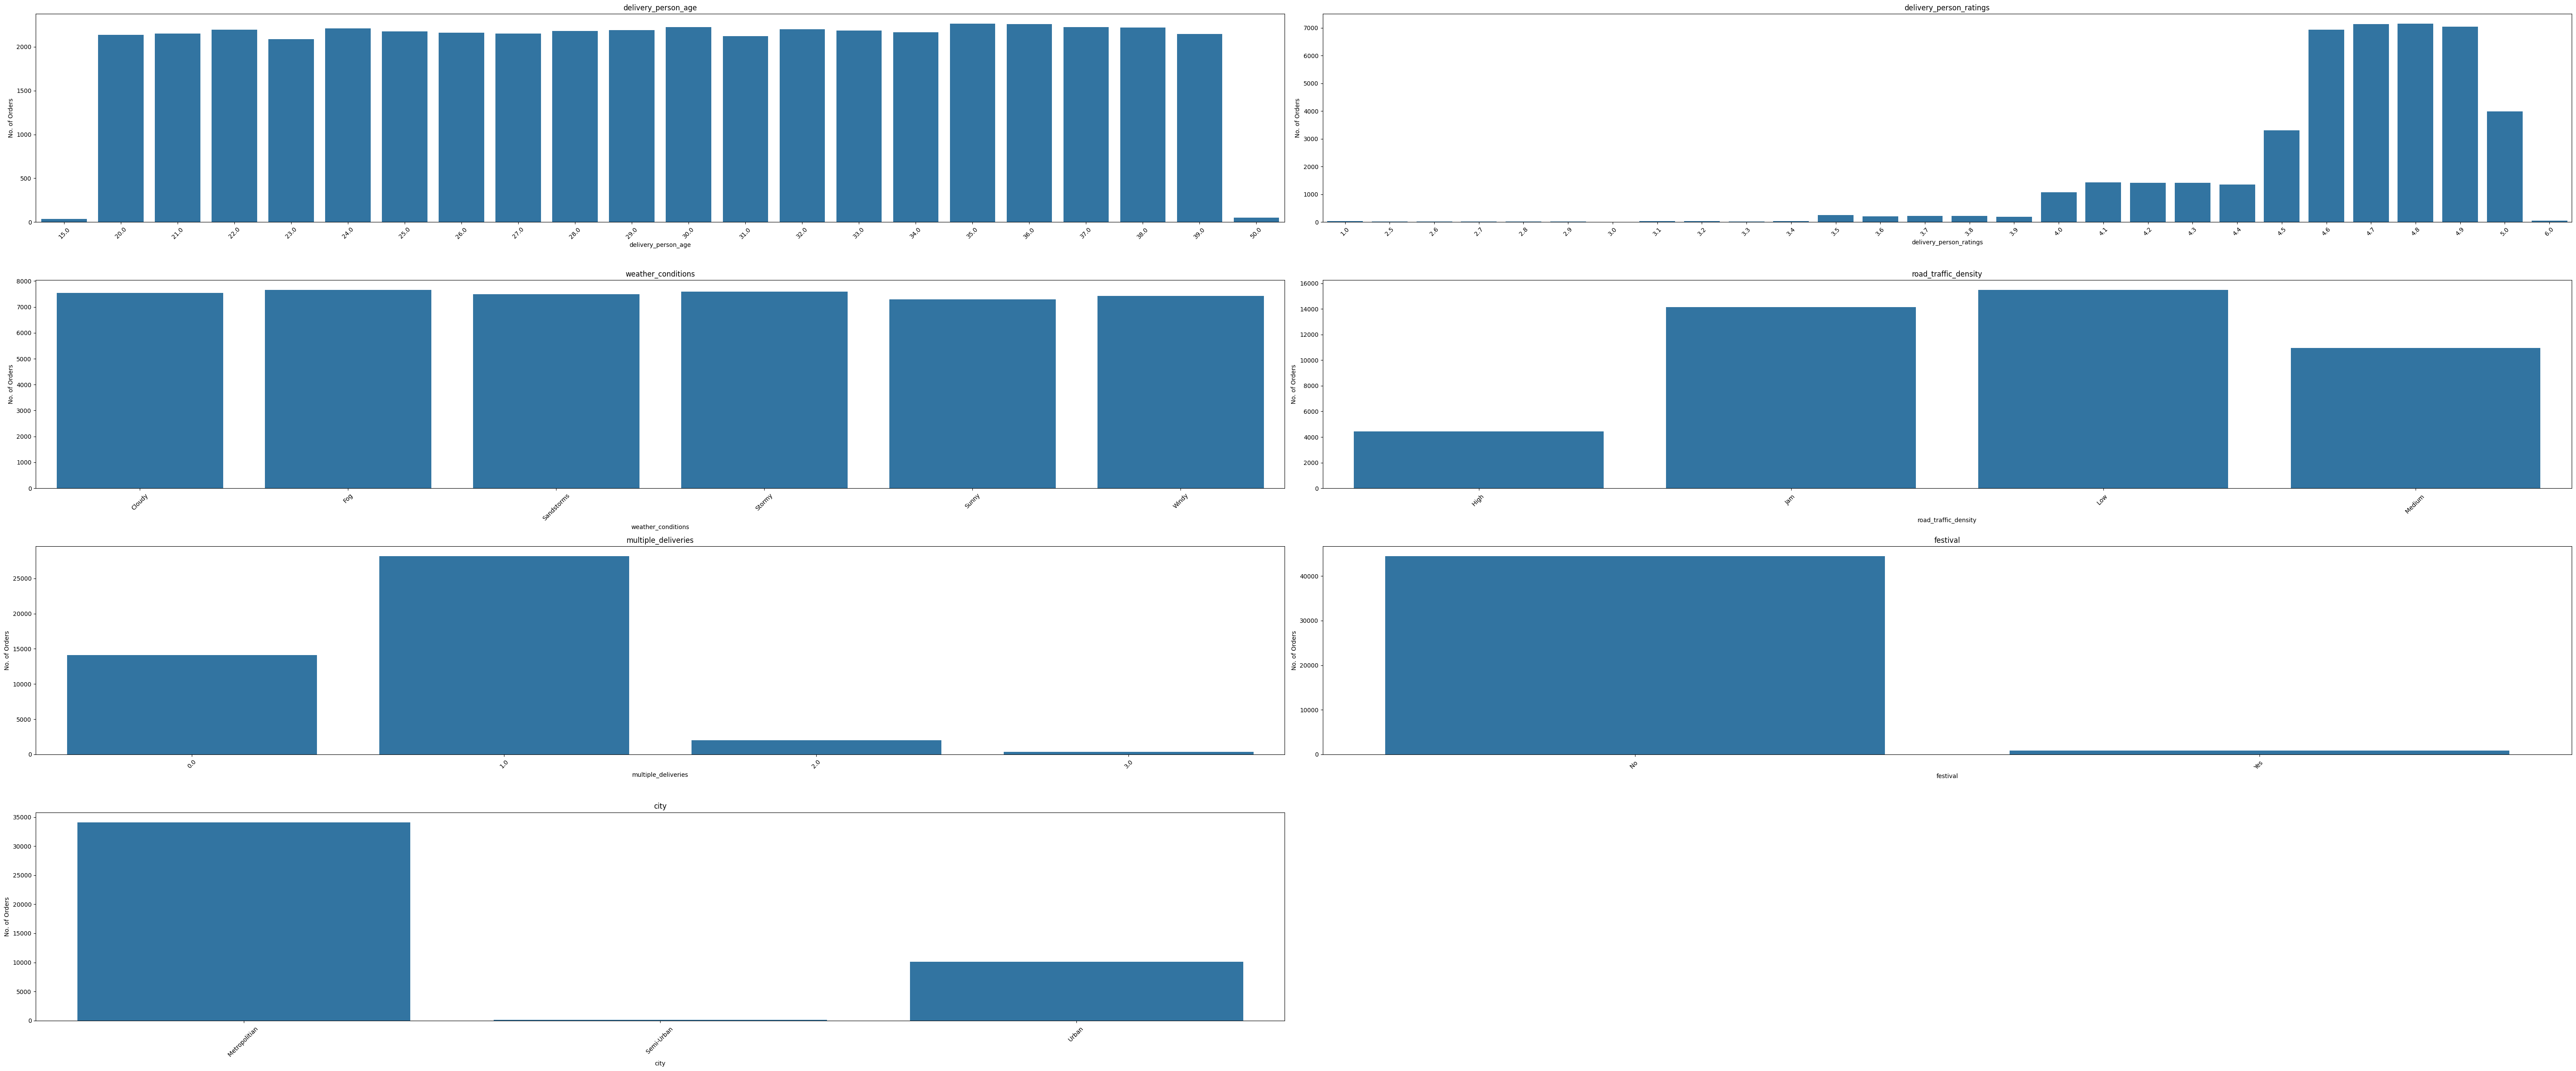

In [17]:
#Let's explore columns that have null values
cols = ['delivery_person_age','delivery_person_ratings','weather_conditions','road_traffic_density','multiple_deliveries','festival','city']
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(60,25))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.countplot(data=df_train, x=column_name, order=df_train[column_name].value_counts().sort_index().index, ax=ax)

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x', rotation=45)

if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [18]:
#Handle null values

# For categorical columns use mode as imputation for np.nan
## ["weatherconditions","road_traffic_density","city_area","festival"]

# For numeric columns use median or mode as imputation for np.nan
## ['delivery_person_age', 'delivery_person_ratings'] -- median
## ['multiple_deliveries'] -- mode

#

def handle_null_values(df):
    df["delivery_person_age"] = df["delivery_person_age"].fillna(df["delivery_person_age"].astype("float").median())
    df['weather_conditions'].fillna(df['weather_conditions'].mode()[0], inplace=True)
    df['city'].fillna(df['city'].mode()[0], inplace=True)
    df['festival'].fillna(df['festival'].mode()[0], inplace=True)
    df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
    df['road_traffic_density'].fillna(df['road_traffic_density'].mode()[0], inplace=True)     # ====> Sub problem explore another model for prediction
    df['delivery_person_ratings'].fillna(df['delivery_person_ratings'].median(), inplace=True)
    df.replace(np.nan,np.random.choice(df['delivery_person_age']) , regex=True,inplace=True)

handle_null_values(df_train)
df_train.isnull().sum()

,0
id,0
delivery_person_id,0
delivery_person_age,0
delivery_person_ratings,0
restaurant_latitude,0
restaurant_longitude,0
delivery_location_latitude,0
delivery_location_longitude,0
order_date,0
time_orderd,0


In [19]:
df_train.isnull().sum()

,0
id,0
delivery_person_id,0
delivery_person_age,0
delivery_person_ratings,0
restaurant_latitude,0
restaurant_longitude,0
delivery_location_latitude,0
delivery_location_longitude,0
order_date,0
time_orderd,0


In [20]:
#Drop Columns which won't be use for building model
def drop_columns(df):
    df.drop(['id','delivery_person_id'],axis=1,inplace=True)

print("Before No. of columns: ",df_train.shape[1])
drop_columns(df_train)
print("After No. of columns: ",df_train.shape[1])

Before No. of columns:  21
After No. of columns:  19


#Vizualizations

In [21]:
import numpy as np
import pandas as pd

# For plotting maps
import folium

# For Regular Expressions
import re

# For working with geographical data
import geopandas

# For plotting in python
import matplotlib
import matplotlib.pyplot as plt

In [22]:
# https://github.com/covid19india/covid19india-react/blob/master/public/maps/india.json

In [23]:
india_geojson=geopandas.read_file('india.json')
india_geojson.head()

,id,district,dt_code,st_nm,st_code,year,geometry
0,None,Aizawl,261,Mizoram,15,2011_c,"POLYGON ((93.04466 23.41052, 92.9468 23.51363,..."
1,None,Champhai,262,Mizoram,15,2011_c,"MULTIPOLYGON (((93.04619 23.66623, 93.04466 23..."
2,None,Kolasib,263,Mizoram,15,2011_c,"POLYGON ((92.89633 24.39072, 92.86116 24.31374..."
3,None,Lawngtlai,264,Mizoram,15,2011_c,"POLYGON ((92.93456 22.55405, 92.9315 22.39458,..."
4,None,Lunglei,265,Mizoram,15,2011_c,"POLYGON ((92.67307 23.38303, 92.68989 23.32804..."


<Axes: >

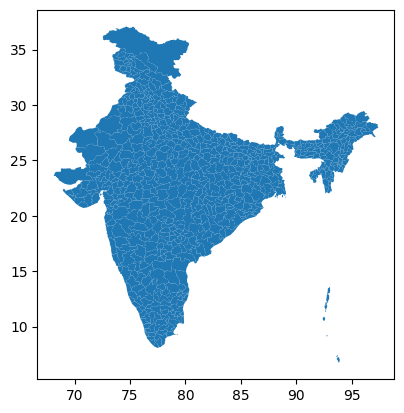

In [24]:
india_geojson.plot()

In [25]:
df_train['city'].value_counts()

,count
city,
Metropolitian,35293
Urban,10136
Semi-Urban,164


In [26]:
from branca.element import Figure
fig=Figure(width=550,height=350)

In [27]:
# Creating Basemap
fig3=Figure(width=550,height=350)
m3=folium.Map(location=[22.7196, 75.8577],tiles='cartodbpositron',zoom_start=11)
fig3.add_child(m3)

In [28]:
f1=folium.FeatureGroup("Delivery 1")

In [29]:
df_train.head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_in_min,city_code
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN


In [30]:
coords_1=[[ df_train['delivery_location_latitude'][0], df_train['delivery_location_longitude'][0]],[df_train['restaurant_latitude'][0], df_train['restaurant_longitude'][0]]]

In [31]:
line_1=folium.vector_layers.PolyLine(coords_1,popup='<b>Delivery_1</b>',tooltip='D_1',color='blue',weight=10).add_to(f1)

In [32]:
f1.add_to(m3)
folium.LayerControl().add_to(m3)
m3

In [33]:
df_indore_data = df_train[df_train['city_code']=='INDO']

In [34]:
df_indore_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3159 entries, 0 to 45563
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   delivery_person_age          3159 non-null   float64       
 1   delivery_person_ratings      3159 non-null   float64       
 2   restaurant_latitude          3159 non-null   float64       
 3   restaurant_longitude         3159 non-null   float64       
 4   delivery_location_latitude   3159 non-null   float64       
 5   delivery_location_longitude  3159 non-null   float64       
 6   order_date                   3159 non-null   datetime64[ns]
 7   time_orderd                  3159 non-null   object        
 8   time_order_picked            3159 non-null   object        
 9   weather_conditions           3159 non-null   object        
 10  road_traffic_density         3159 non-null   object        
 11  vehicle_condition            3159 non-null   in

In [35]:
m = folium.Map([22.7196, 75.8577], zoom_start=11)

for _, row in df_indore_data.head(50).iterrows():
    folium.CircleMarker([row['restaurant_latitude'], row['restaurant_longitude']],
                        radius=15,
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

    folium.CircleMarker([row['delivery_location_latitude'], row['delivery_location_longitude']],
                        radius=15,
                        fill_color="red", # divvy color
                       ).add_to(m)

    folium.PolyLine([[row['restaurant_latitude'], row['restaurant_longitude']],
                     [row['delivery_location_latitude'], row['delivery_location_longitude']]]).add_to(m)
m

# Feature Engineering

In [36]:
def extract_date_features(data):
    data["day"] = data.order_date.dt.day
    data["month"] = data.order_date.dt.month
    data["quarter"] = data.order_date.dt.quarter
    data["year"] = data.order_date.dt.year
    data['day_of_week'] = data.order_date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.order_date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.order_date.dt.is_month_end.astype(int)
    data["is_quarter_start"] = data.order_date.dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data.order_date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.order_date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.order_date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(df_train)
df_train.head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,1,2022,5,0,0,0,0,0,0,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,1,2022,4,0,0,0,0,0,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,1,2022,5,0,0,0,0,0,0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,2,2022,1,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,1,2022,5,0,0,0,0,0,0,1


In [37]:
#Calculate Time Difference

def calculate_picked_time(row):
    # Add a day offset if 'time_order_picked' is less than 'time_orderd'
    if row['time_order_picked'] < row['time_orderd']:
        return row['order_date'] + pd.DateOffset(days=1) + row['time_order_picked']
    else:
        return row['order_date'] + row['time_order_picked']

def calculate_time_diff(df):
    # Find the difference between ordered time & picked time
    df['time_orderd'] = pd.to_timedelta(df['time_orderd'])
    df['time_order_picked'] = pd.to_timedelta(df['time_order_picked'])

    df['time_order_picked_formatted'] = df.apply(calculate_picked_time, axis=1)
    df['time_ordered_formatted'] = df['order_date'] + df['time_orderd']

    df['time_order_picked_formatted'] = pd.to_datetime(df['time_order_picked_formatted'])
    df['time_ordered_formatted'] = pd.to_datetime(df['time_ordered_formatted'])

    df['order_prepare_time'] = (df['time_order_picked_formatted'] - df['time_ordered_formatted']).dt.total_seconds() / 60

    # Handle null values by filling with the median
    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)

    # Drop all the time & date related columns
    df.drop(['time_orderd', 'time_order_picked', 'time_ordered_formatted', 'time_order_picked_formatted', 'order_date'], axis=1, inplace=True)


calculate_time_diff(df_train)
df_train.head()


,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,...,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,2022,5,0,0,0,0,0,0,1,15.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,2022,4,0,0,0,0,0,0,0,5.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,2022,5,0,0,0,0,0,0,1,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,2022,1,0,0,0,0,0,0,0,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,2022,5,0,0,0,0,0,0,1,15.0


In [38]:
#Calculate distance between restaurant location & delivery location

# using haversine method
def haversine_distance(loc_list):
    # earth's radius in km
    R = 6371.0

    # convert lat and lon from deg to radians
    lat1,lon1,lat2,lon2 = map(np.radians,loc_list)
    # diff between lat and lon
    d_lat = lat2 - lat1
    d_lon = lon2 - lon1
    # applying haversine formula
    a = np.sin(d_lat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(d_lon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d = R * c
    return round(d,2)

loc_cols = ["restaurant_latitude", "restaurant_longitude", "delivery_location_latitude", "delivery_location_longitude"]

df_train['restaurant_latitude'] = pd.to_numeric(df_train['restaurant_latitude'], errors='coerce')
df_train['restaurant_longitude'] = pd.to_numeric(df_train['restaurant_longitude'], errors='coerce')
df_train['delivery_location_latitude'] = pd.to_numeric(df_train['delivery_location_latitude'], errors='coerce')
df_train['delivery_location_longitude'] = pd.to_numeric(df_train['delivery_location_longitude'], errors='coerce')

distance = []

    # Iterate over each row in the DataFrame
for _, row in df_train.iterrows():
    # Extract values for the location columns
    location_list = [row[col] for col in loc_cols]

    # Calculate haversine distance
    distance.append(haversine_distance(location_list))

# Add the distances as a new column
df_train["distance"] = distance


df_train.head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,5,0,0,0,0,0,0,1,15.0,3.03
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,4,0,0,0,0,0,0,0,5.0,20.18
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,5,0,0,0,0,0,0,1,15.0,1.55
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,1,0,0,0,0,0,0,0,10.0,7.79
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,5,0,0,0,0,0,0,1,15.0,6.21


In [39]:
# Issue while doing predction as it expects str
#df_train[['restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude']] = df_train[['restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude']].astype(str)

In [40]:
# Strip spaces from the object type  columns as there is space for NaN
df_train = df_train.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [41]:

# To remove the rows with zero lat and long
def drop_zero_lat_long(data):
    dataframe = data[-((data["restaurant_latitude"]==0.0) & (data["restaurant_longitude"]==0.0)) ]
    return dataframe


df_train = drop_zero_lat_long(df_train)

### Label Encoding - Categorical Features

In [42]:
weather_mappings = {
    "Sunny": 0,
    "Stormy": 1,
    "Sandstorms": 2,
    "Cloudy": 3,
    "Fog": 4,
    "Windy": 5
}

traff_den_mappings = {
    "High": 0,
    "Jam": 1,
    "Low": 2,
    "Medium": 3
}

order_type_mappings = {
    "Snack": 0,
    "Drinks": 1,
    "Buffet": 2,
    "Meal": 3
}

vehicle_mappings = {
    "motorcycle": 0,
    "scooter": 1,
    "electric_scooter": 2,
    "bicycle": 3
}

festival_mappings = {
    "No": 0,
    "Yes": 1
}

city_area_mappings = {
    "Urban": 0,
    "Metropolitian": 1,
    "Semi-Urban": 2
}

city_mappings = {
    "INDO": 0,
    "BANG": 1,
    "COIMB": 2,
    "CHEN": 3,
    "HYD": 4,
    "RANCHI": 5,
    "MYS": 6,
    "DEH": 7,
    "KOC": 8,
    "PUNE": 9,
    "LUDH": 10,
    "KNP": 11,
    "MUM": 12,
    "KOL": 13,
    "JAP": 14,
    "SUR": 15,
    "GOA": 16,
    "AURG": 17,
    "AGR": 18,
    "VAD": 19,
    "ALH": 20,
    "BHP": 21
}

mnth_mappings = {
    "January": 0,
    "February": 1,
    "March": 2,
    "April": 3,
    "May": 4,
    "June": 5,
    "July": 6,
    "August": 7,
    "September": 8,
    "October": 9,
    "November": 10,
    "December": 11
}

In [43]:



class WeekdayImputer(BaseEstimator, TransformerMixin):
    """ Impute missing values in 'weekday' column by extracting dayname from 'dteday' column """

    def __init__(self, variable: str, date_var:str):

        if not isinstance(variable, str):
            raise ValueError("variable name should be a string")
        if not isinstance(date_var, str):
            raise ValueError("date variable name should be a string")

        self.variable = variable
        self.date_var = date_var

    def fit(self, X: pd.DataFrame, y: pd.Series = None):
        # we need the fit statement to accomodate the sklearn pipeline
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        # convert 'dteday' column to Datetime datatype
        X[self.date_var] = pd.to_datetime(X[self.date_var], format='%Y-%m-%d')

        wkday_null_idx = X[X[self.variable].isnull() == True].index
        X.loc[wkday_null_idx, self.variable] = X.loc[wkday_null_idx, self.date_var].dt.day_name().apply(lambda x: x[:3])

        # drop 'dteday' column after imputation
        X.drop(self.date_var, axis=1, inplace=True)

        return X


class WeathersitImputer(BaseEstimator, TransformerMixin):
    """ Impute missing values in 'weathersit' column by replacing them with the most frequent category value """

    def __init__(self, variable: str):

        if not isinstance(variable, str):
            raise ValueError("variable name should be a string")

        self.variable = variable

    def fit(self, X: pd.DataFrame, y: pd.Series = None):
        # we need the fit statement to accomodate the sklearn pipeline
        X = X.copy()
        self.fill_value = X[self.variable].mode()[0]

        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        X[self.variable] = X[self.variable].fillna(self.fill_value)

        return X


class Mapper(BaseEstimator, TransformerMixin):
    """
    Ordinal categorical variable mapper:
    Treat column as Ordinal categorical variable, and assign values accordingly
    """

    def __init__(self, variable:str, mappings:dict):

        if not isinstance(variable, str):
            raise ValueError("variable name should be a string")

        self.variable = variable
        self.mappings = mappings

    def fit(self, X: pd.DataFrame, y: pd.Series = None):
        # we need the fit statement to accomodate the sklearn pipeline
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        X[self.variable] = X[self.variable].map(self.mappings).astype(int)

        return X


class OutlierHandler(BaseEstimator, TransformerMixin):
    """
    Change the outlier values:
        - to upper-bound, if the value is higher than upper-bound, or
        - to lower-bound, if the value is lower than lower-bound respectively.
    """

    def __init__(self, variable:str):

        if not isinstance(variable, str):
            raise ValueError("variable name should be a string")

        self.variable = variable

    def fit(self, X: pd.DataFrame, y: pd.Series = None):
        # we need the fit statement to accomodate the sklearn pipeline
        X = X.copy()
        q1 = X.describe()[self.variable].loc['25%']
        q3 = X.describe()[self.variable].loc['75%']
        iqr = q3 - q1
        self.lower_bound = q1 - (1.5 * iqr)
        self.upper_bound = q3 + (1.5 * iqr)

        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()

        for i in X.index:
            if X.loc[i, self.variable] > self.upper_bound:
                X.loc[i, self.variable]= self.upper_bound
            if X.loc[i, self.variable] < self.lower_bound:
                X.loc[i, self.variable]= self.lower_bound

        return X


class WeekdayOneHotEncoder(BaseEstimator, TransformerMixin):
    """ One-hot encode weekday column """

    def __init__(self, variable:str):

        if not isinstance(variable, str):
            raise ValueError("variable name should be a string")

        self.variable = variable
        self.encoder = OneHotEncoder(sparse_output=False)

    def fit(self, X: pd.DataFrame, y: pd.Series = None):
        # we need the fit statement to accomodate the sklearn pipeline
        X = X.copy()
        self.encoder.fit(X[[self.variable]])
        # Get encoded feature names
        self.encoded_features_names = self.encoder.get_feature_names_out([self.variable])

        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()

        encoded_weekdays = self.encoder.transform(X[[self.variable]])
        # Append encoded weekday features to X
        X[self.encoded_features_names] = encoded_weekdays

        # drop 'weekday' column after encoding
        X.drop(self.variable, axis=1, inplace=True)

        return X

In [44]:
prep_data = df_train.copy()

In [45]:
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41953 entries, 0 to 45592
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   delivery_person_age          41953 non-null  float64
 1   delivery_person_ratings      41953 non-null  float64
 2   restaurant_latitude          41953 non-null  float64
 3   restaurant_longitude         41953 non-null  float64
 4   delivery_location_latitude   41953 non-null  float64
 5   delivery_location_longitude  41953 non-null  float64
 6   weather_conditions           41953 non-null  object 
 7   road_traffic_density         41953 non-null  object 
 8   vehicle_condition            41953 non-null  int64  
 9   type_of_order                41953 non-null  object 
 10  type_of_vehicle              41953 non-null  object 
 11  multiple_deliveries          41953 non-null  float64
 12  festival                     41953 non-null  object 
 13  city                 

In [46]:
prep_data["weather_conditions"] = prep_data["weather_conditions"].map(weather_mappings)
prep_data["road_traffic_density"] = prep_data["road_traffic_density"].map(traff_den_mappings)
prep_data["type_of_order"] = prep_data["type_of_order"].map(order_type_mappings)
prep_data["type_of_vehicle"] = prep_data["type_of_vehicle"].map(vehicle_mappings)
prep_data["city"] = prep_data["city"].map(city_area_mappings)
prep_data["festival"] = prep_data["festival"].map(festival_mappings)
prep_data["month"] = prep_data["month"].map(mnth_mappings)

In [47]:
df_train.head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,5,0,0,0,0,0,0,1,15.0,3.03
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,4,0,0,0,0,0,0,0,5.0,20.18
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,5,0,0,0,0,0,0,1,15.0,1.55
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,1,0,0,0,0,0,0,0,10.0,7.79
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,5,0,0,0,0,0,0,1,15.0,6.21


In [48]:
prep_data.head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,0,0,2,0,...,5,0,0,0,0,0,0,1,15.0,3.03
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,1,1,2,0,...,4,0,0,0,0,0,0,0,5.0,20.18
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,1,...,5,0,0,0,0,0,0,1,15.0,1.55
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0,3,0,2,...,1,0,0,0,0,0,0,0,10.0,7.79
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,3,0,1,0,...,5,0,0,0,0,0,0,1,15.0,6.21


### Model Training

In [49]:

target = ['time_taken_in_min']
features = ['delivery_person_age', 'delivery_person_ratings', 'restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude', 'weather_conditions', 'road_traffic_density', 'vehicle_condition', 'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival', 'city', 'day_of_week', 'is_weekend', 'quarter', 'year', 'month', 'distance', 'order_prepare_time']


In [50]:
# divide train and test
X_train, X_test, y_train, y_test = train_test_split(

        prep_data[features],     # predictors
        prep_data[target],       # target
        test_size = 0.2,
        random_state= 42,   # set the random seed here for reproducibility
    )

# split across date - strategy



In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [10,20,40,50,100],
    'max_depth': [3,5,7,9]
    }

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate on test data
y_pred = best_model.predict(X_test)
print("R² Score:", best_model.score(X_test, y_test))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'max_depth': 9, 'n_estimators': 100}
R² Score: 0.8095158951042607


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define model
rf = xgb.XGBRegressor(random_state=42)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [10,20,40,50,100],
    'max_depth': [3,5,7,9]
    }

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate on test data
y_pred = best_model.predict(X_test)
print("R² Score:", best_model.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'max_depth': 9, 'n_estimators': 10}
R² Score: 0.820448637008667


In [54]:
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, mean_absolute_percentage_error

In [55]:
# Model Development
xgb_model = xgb.XGBRegressor(
        n_estimators=10,  # Number of boosting rounds (trees)
    max_depth=9,       # Maximum depth of the trees
    random_state=42     # Random seed for reproducibility

)

In [56]:
# Train the model on training data
xgb_model.fit(X_train, y_train)

# Inference: Predict on the test data
y_pred = xgb_model.predict(X_test)

In [57]:

# Metrics
print("R2 score:", r2_score(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print(f"Root mean squared error:{np.sqrt(mean_squared_error(y_test,y_pred))}")
print("Mean Absolute Pecentage error:",mean_absolute_percentage_error(y_test,y_pred))

R2 score: 0.820448637008667
Mean squared error: 15.4694434498557
Root mean squared error:3.9331213367827464
Mean Absolute Pecentage error: 0.13655342490050418


In [58]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Find the best model
models = [
    #LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor(),
]

param_grid = [
    {},
    {'max_depth': [3, 5, 7]},
    {'n_estimators': [100, 200, 300]},
    {'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9]},
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

DecisionTreeRegressor:
Best parameters: {}
Best R2 score: 0.6583261292717556

RandomForestRegressor:
Best parameters: {'max_depth': 7}
Best R2 score: 0.7199318517163137

XGBRegressor:
Best parameters: {'n_estimators': 100}
Best R2 score: 0.8102468729019165



In [59]:
X_train.head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,...,multiple_deliveries,festival,city,day_of_week,is_weekend,quarter,year,month,distance,order_prepare_time
38731,34.0,4.1,12.284747,76.625861,12.354747,76.695861,4,2,0,1,...,2.0,0,1,4,0,1,2022,NaN,10.88,15.0
6829,34.0,4.9,12.970221,77.645396,13.000221,77.675396,0,3,1,1,...,0.0,0,1,5,1,1,2022,NaN,4.66,15.0
37417,34.0,4.7,27.161694,78.034714,27.221694,78.094714,3,3,2,2,...,1.0,0,0,6,1,1,2022,NaN,8.93,5.0
33229,23.0,4.9,13.029198,77.570997,13.119198,77.660997,3,2,0,0,...,0.0,0,0,2,0,1,2022,NaN,13.97,15.0
6539,37.0,4.5,12.316967,76.603067,12.346967,76.633067,3,3,0,1,...,1.0,0,1,0,0,1,2022,NaN,4.66,10.0


In [60]:
df_train.head()

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,5,0,0,0,0,0,0,1,15.0,3.03
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,4,0,0,0,0,0,0,0,5.0,20.18
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,5,0,0,0,0,0,0,1,15.0,1.55
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,1,0,0,0,0,0,0,0,10.0,7.79
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,5,0,0,0,0,0,0,1,15.0,6.21
